In [3]:
import torch
# Create *known* parameters
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [5]:
X_train,Y_train = X[:80], y[:80]
X_test,Y_test = X[80:101], y[80:101]

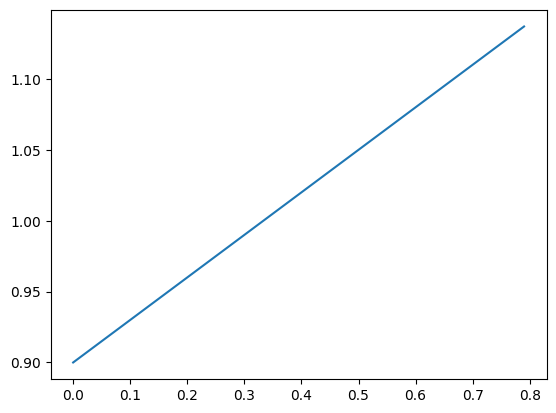

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_train,Y_train)

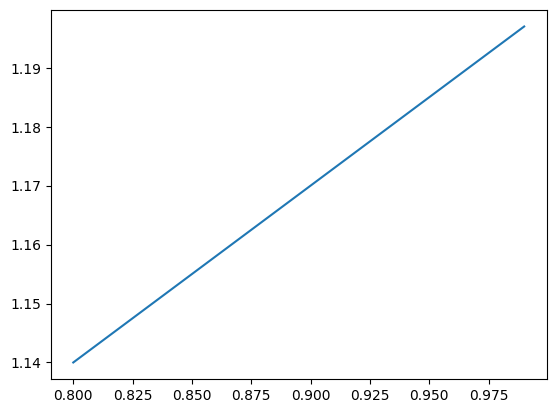

In [19]:
plt.plot(X_test,Y_test)

In [9]:
from torch import nn

# Option 1 - subclass torch.nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Use nn.Linear() for creating the model parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# Step 2: Create an instance of the model
model = LinearRegressionModel()

# Step 3: Inspect model parameters
print("Model parameters (state_dict):")
print(model.state_dict())

# Optional: check parameter values directly
print("\nWeight:", model.weight.item())
print("Bias:", model.bias.item())

Model parameters (state_dict):
OrderedDict({'weight': tensor([2.2142]), 'bias': tensor([-1.0096])})

Weight: 2.2142350673675537
Bias: -1.0096217393875122


In [14]:
import torch
from torch import nn

# Step 1: Define the model using nn.Linear
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # nn.Linear(in_features, out_features)
        # automatically creates weight and bias parameters
        self.linear = nn.Linear(1, 1)  
    
    def forward(self, x):
        # Linear model: y = w * x + b
        return self.linear(x)

# Step 2: Create an instance of the model
model = LinearRegressionModel()

# Step 3: Inspect model parameters
print("Model parameters (state_dict):")
print(model.state_dict())

# Optional: check individual parameter values
print("\nWeight:", model.linear.weight.item())
print("Bias:", model.linear.bias.item())

Model parameters (state_dict):
OrderedDict({'linear.weight': tensor([[-0.0605]]), 'linear.bias': tensor([-0.3708])})

Weight: -0.06050705909729004
Bias: -0.37078285217285156


In [17]:
# Step 3
criterion = nn.L1Loss()  # L1 loss (|y_pred - y_true|)

# Step 4: Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 5: Inspect
print("Model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

print("\nLoss function:", criterion)
print("Optimizer:", optimizer)

Model parameters:
linear.weight: tensor([[-0.0605]])
linear.bias: tensor([-0.3708])

Loss function: L1Loss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [20]:
epochs = 300
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    
    y_pred = model(X_train)
    loss_ = criterion(Y_train,y_pred)
    
    optimizer.zero_grad()
    
    loss_.backward() 
    optimizer.step() 
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        w, b = model.linear.weight.item(), model.linear.bias.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_.item():.4f}, w={w:.3f}, b={b:.3f}")

Epoch [20/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [40/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [60/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [80/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [100/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [120/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [140/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [160/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [180/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [200/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [220/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [240/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [260/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [280/300], Loss: 0.0035, w=0.308, b=0.905
Epoch [300/300], Loss: 0.0035, w=0.308, b=0.905
